**CIS Mini Friendly Competition - My Notebook**

**1) UNDERSTANDING THE DATA**

We have fish farms that are equipped with cameras which can allow us to get measurements of the swimming fish. We want to use those measurements to estimate their weights using a Machine Learning model.

**2) IMPORTING THE LIBRARIES**

While solving the challenge, I used the following libraries:

Pandas = for data manipulation and analysis

Numpy = for manipulating matrices

Seaborn and Matplotlib = for statistical data visualization

Sklearn = to perform the regression algorithm

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**3) IMPORTING THE DATA TO GOOGLE COLAB**

Since I used Google Collab to solve this challenge, there were extra few steps I had to take to get the data, like importing the io and files libraries from Google Collab, and using them to upload the Train and Test csv files to the notebook. Then I used the Pandas library to read the csv files into dataframes.

In [ ]:
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Train.csv to Train (3).csv


In [ ]:
uploaded2 = files.upload()

Saving Test.csv to Test (2).csv


In [ ]:
Train = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
Test = pd.read_csv(io.BytesIO(uploaded2['Test.csv']))

**4) UNDERSTANDING THE DATA**

Here are the first 5 rows in the Train dataframe.

Espèce: Fish species

Poids: Fish weight in grams

LongueurVer: Vertical length in cm

LongueurDia: Diagonal length in cm

LongueurCro: Length of the cross in cm

Hauteur: Height in cm

Largeur: Diagonal width in cm

In [ ]:
Train.head()

,ID,Espèce,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur,Poids
0,hAmkM80XrB,Dorade,30.9,33.5,38.6,15.6330,5.1338,610.0
1,j5tRKxc3P4,Éperlan,9.3,9.8,10.8,1.7388,1.0476,6.7
2,w2M3CLts3v,Brochet,48.3,51.7,55.1,8.9262,6.1712,950.0
3,9XCIhKuBo3,Gardon,17.5,18.8,21.2,5.5756,2.9044,78.0
4,xb0n1Eyv8Y,Perche,19.0,21.0,22.5,5.6925,3.5550,110.0


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           123 non-null    object 
 1   Espèce       123 non-null    object 
 2   LongueurVer  122 non-null    float64
 3   LongueurDia  121 non-null    float64
 4   LongueurCro  123 non-null    float64
 5   Hauteur      122 non-null    float64
 6   Largeur      122 non-null    float64
 7   Poids        123 non-null    float64
dtypes: float64(6), object(2)
memory usage: 7.8+ KB


In [ ]:
Train.describe()

,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur,Poids
count,122.000000,121.000000,123.000000,122.000000,122.000000,123.000000
mean,26.082787,28.566942,31.351220,8.800984,4.392384,402.913008
std,10.968405,11.497763,12.669231,4.225893,1.765300,374.588150
min,0.000000,8.400000,0.000000,1.728400,0.000000,5.700000
25%,19.000000,21.000000,22.650000,5.992400,3.399375,120.000000
50%,24.000000,26.500000,29.300000,7.806200,4.277050,273.000000
75%,33.650000,36.500000,40.950000,11.931750,5.783625,605.000000
max,59.000000,63.400000,68.000000,18.957000,8.142000,1650.000000


**GOAL 1: BETTER EXPLORE YOUR DATA**

To better explore the given data, I used the Seaborn Pairplot function which plots pairwise relationships in a dataset.

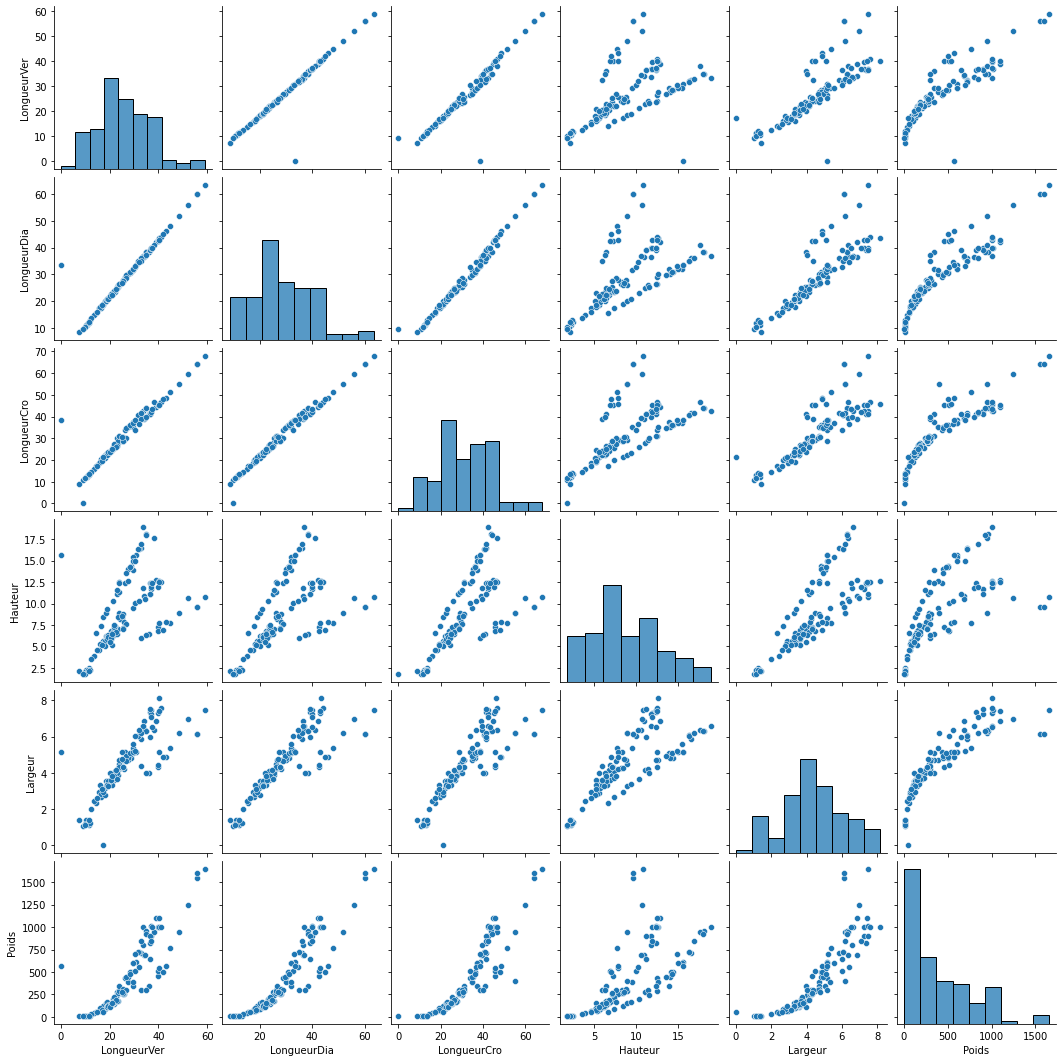

In [ ]:
sns.pairplot(Train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


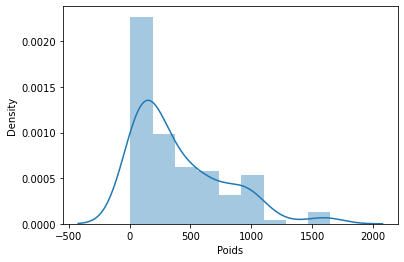

In [ ]:
sns.distplot(Train['Poids'])

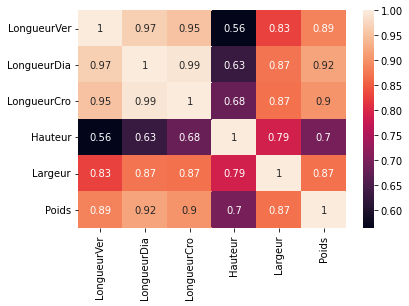

In [ ]:
sns.heatmap(Train.corr(), annot = True)

**GOAL 2: PERFORM DATA PRE-PROCESSING**

In the pre-processing phase I started off by dropping the ID and Espece columns from the Train dataframe, thus the axis is 1 since we’re dropping the columns, and inplace equals to true since we’re applying the changes to the actual dataframe.

Then I replaced the NaN (Not a number) and the infinite values with 0 in order to be able to train the model, and reset the indexes to the default numeric indexes.

Afterwards I created two new variables, X is a sub-dataframe containing only the LongueurVer, LongueurDia, LongeurCro, Hauteur, Largeur columns, and the Y is another sub-dataframe containing the Poinds column.

Later I split the Train dataframe into random train and test sub-dataframes, with 40% of it being the test sub-dataframe. Setting a value for the random_state in this case 101 will allow us to reproduce the same result each time.

In [ ]:
Train.drop(['ID'], axis = 1, inplace = True)
Train.drop(['Espèce'], axis = 1, inplace = True)

In [ ]:
Train = Train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop = True)

In [ ]:
Train.columns

Index(['LongueurVer', 'LongueurDia', 'LongueurCro', 'Hauteur', 'Largeur',
       'Poids'],
      dtype='object')

In [ ]:
X = Train[['LongueurVer', 'LongueurDia', 'LongueurCro', 'Hauteur','Largeur']]

Y = Train['Poids']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 101)

In [ ]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop = True)

**GOAL 3: TRAIN YOUR MACHINE LEARNING MODEL**

Since we want to estimate the weights of the swimming fish by using their measurements, we can use the linear regression algorithm to train our machine learning model. To do that we passed to it the train dataframe.

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

**GOAL 4: EVALUATE YOUR MODEL**

To evaluate my machine learning model, I used the test split to predict the weight of the fish, and calculated the average squared difference between the estimated values and the actual values.

In [ ]:
predictions = lm.predict(X_test)

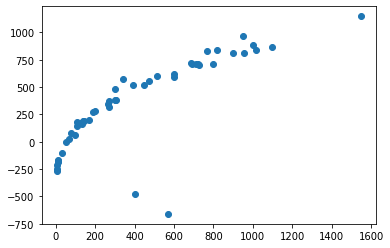

In [ ]:
plt.scatter(Y_test, predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


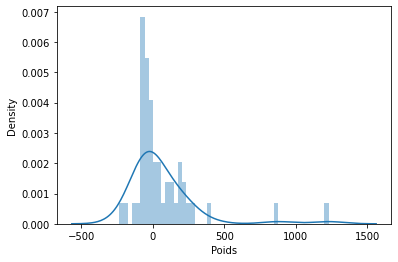

In [ ]:
sns.distplot((Y_test-predictions), bins = 50);

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 135.8996114582711
MSE: 61737.32172012558
RMSE: 248.46996140404093


**GOAL 5: GENERATE PREDICTIONS ON TEST DATA**

To generate predictions on the Test data given to us, first I created a new dataframe called SubmissionFile containing the column ID of the Test dataframe. Then I dropped the ID and Espece columns from the Test dataframe same as a did for the Train dataframe earlier, ran it through the model, and saved the results in a new column in the SubmissionFile dataframe.

In [ ]:
SubmissionFile = Test[['ID']]

In [ ]:
Test.drop(['ID'], axis = 1, inplace = True)
Test.drop(['Espèce'], axis = 1, inplace = True)

In [ ]:
predictions2 = lm.predict(Test)

In [ ]:
Test['Poids'] = predictions2

In [ ]:
SubmissionFile['Poids Estimé'] = Test[['Poids']]
SubmissionFile.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Poids Estimé
0,5gLYcjsz9z,290.876959
1,j0rBCrMwYa,688.271135
2,GI72jxWh7u,343.833656
3,YJNyDH3z1V,376.133721
4,y98GtegfKY,160.098743


**GOAL 6: PREPARE THE SUBMISSION FILE**

Finally I set the ID column to be the index column for the SubmissionFile dataframe, turned the dataframe into a comma-separated values file, and downloaded it.

In [ ]:
SubmissionFile.set_index('ID')
SubmissionFile.head()

,ID,Poids Estimé
0,5gLYcjsz9z,290.876959
1,j0rBCrMwYa,688.271135
2,GI72jxWh7u,343.833656
3,YJNyDH3z1V,376.133721
4,y98GtegfKY,160.098743


In [ ]:
SubmissionFile.to_csv('Submission_1.csv', encoding = 'utf-8-sig') 
files.download('Submission_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>